number of estimated clusters : 2
number of estimated clusters : 7


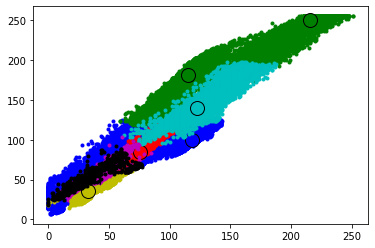

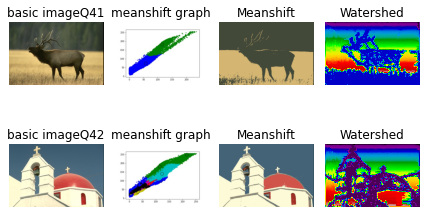

In [4]:
import sys
from sklearn.cluster import MeanShift,estimate_bandwidth
from cv2 import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max


def mshift(img_tmp):
    # most of the codes are from :A demo of the mean-shift clustering algorithm
    # offerred by teacher
    shape = img_tmp.shape
    img = np.reshape(img_tmp,[-1,3]) # convert rbg color matrix to flattened matrix

    bandwidth = estimate_bandwidth(img, quantile=0.3, n_samples=500)
    # if auto banwidth is used, the program will be time out
    # smaller quantile chosen, more realistic picture will shown,
    # more clusters will be found
    # infact choosing quantile like 0.2 or 0.3 is better.
    # we will get a grapg a little bit like cartoon
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(img)
    labels = ms.labels_
    # when labels are found, segementation graph is found
    # the following codes are for drawing the scattergram
    cluster_centers = ms.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    print("number of estimated clusters : %d" % n_clusters_)
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):  # begin to draw the plot imgae
        my_members = labels == k  # my_members will be 1 if  k == labels, else 0. interesting.
        cluster_center = cluster_centers[k]
        plt.plot(img[my_members, 0], img[my_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    plt.savefig('meanshift.jpg')
    mean_fig = cv2.imread('meanshift.jpg',1)
    segmentedimg = cluster_centers[np.reshape(labels,shape[:2])] 
    # convert flattened image back to normal

    return mean_fig,segmentedimg

def water_shed(image):
    # Generate the markers as local maxima of the distance to the background
    distance = ndi.distance_transform_edt(image)

    # local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
    #                             labels=image)

    # I don't know why if using footprint = np.one((3,3)) will cause bugs while facing
    # imgQ42, imgQ41 has the same shape as imgQ42, but imgQ41 won't cause bugs,
    # I have no idea on this problem, I will send an email to ask about this question
    # if I still can't figure this out in the following days

    local_maxi = peak_local_max(distance, indices=False,labels=image,min_distance=1)
    # using min_distance = 1 will have similar result as using footprint = np.one((3,3))
    # atl least while facing the sample images, the results are nearly the same.
    markers = ndi.label(local_maxi)[0]
    labels = watershed(-distance, markers, mask=image)
    return labels


# imgQ41 meanshift
img1 = cv2.imread('imgQ41.jpg',1)
ms_img1,segimg1= mshift(img1)
segimg1 = segimg1.astype(np.uint8)  # without uint8, the picture will be blank
cv2.imwrite('Q41_ms.jpg',ms_img1)
cv2.imwrite('Q41_seg.jpg',segimg1)

# imageQ41 watershed
img2 = cv2.imread('imgQ41.jpg',0)
ws_img2 = water_shed(img2)

# imageQ42 meanshift
img3 = cv2.imread('imgQ42.jpg',1)
ms_img3,segimg3 = mshift(img3)
segimg3 = segimg3.astype(np.uint8) # without uint8, the picture will be blank
cv2.imwrite('Q42_ms.jpg',ms_img3)
cv2.imwrite('Q42_seg.jpg',segimg3)


# imageQ42 watershed
img4 = cv2.imread('imgQ42.jpg',0)
ws_img4 = water_shed(img4)

# plot images
fig, axes = plt.subplots(2,4)
ax = axes.ravel()
ax[0].imshow(img1[:,:,::-1])
ax[0].set_title('basic imageQ41')
ax[1].imshow(ms_img1[:,:,::-1])
ax[1].set_title('meanshift graph')
ax[2].imshow(segimg1[:,:,::-1])
ax[2].set_title('Meanshift')
ax[3].imshow(ws_img2, cmap=plt.cm.nipy_spectral)
ax[3].set_title('Watershed')

ax[4].imshow(img3[:,:,::-1])
ax[4].set_title('basic imageQ42')
ax[5].imshow(ms_img3[:,:,::-1])
ax[5].set_title('meanshift graph')
ax[6].imshow(segimg3[:,:,::-1])
ax[6].set_title('Meanshift')
ax[7].imshow(ws_img4, cmap=plt.cm.nipy_spectral)
ax[7].set_title('Watershed')

for a in ax:
    a.set_axis_off()
# I don't know why sometimes the plot won't show itself,
# so I save it as results.jpg to make sure that I can always see it
plt.savefig('results.jpg')
fig.tight_layout()

plt.show()

